In [54]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import gglngram as gn
import sqlite3 as sq

In [57]:
databasePath = 'database-b.sqlite'

In [58]:
dbconnection = sq.connect(databasePath)
cursor = dbconnection.cursor()

In [59]:
# Get sorted ngrams  by total counts
getTopNgram = """SELECT * from countngram
                      ORDER BY matchcount DESC"""

cursor.execute( getTopNgram )

rows = cursor.fetchall()
for row in rows[:10]:
    print(row)

('bien', 132797609, 786302)
('bien_ADV', 126312985, 785757)
('beaucoup', 37316413, 761231)
('beaucoup_ADV', 37220646, 761159)
('bon', 19953807, 749382)
('bon_ADJ', 19191286, 747913)
('bonne', 16556045, 743188)
('bonne_ADJ', 16556045, 743188)
('but', 16283764, 730827)
('but_NOUN', 16283764, 730827)


In [60]:
print( len(rows) )

412739


In [168]:
def getZscore( years, counts ):
    iMax = np.argmax( counts )
    vMax = counts[ iMax ]
    zScore = (vMax - counts.mean())/counts.std()
    return years[ iMax ], zScore #* np.sqrt(counts.mean())

def getCumulScore( y, c ):
    cm = c.mean()
    cumul = np.cumsum( np.cumsum( (c - cm) ) )

    iMax = np.argmax( cumul )

    return y[ iMax ], cumul[iMax]


In [154]:
zScoreByYear = {}
i = 0
for ng, c, ngs in rows[:1000]:
    year, zScore = getZscore( *gn.getCountPerYear( cursor, ng, k=3, volume=True, normed=True ) )
    
    if year in zScoreByYear:
        zScoreByYear[year].append( [ng, zScore] )
    else:
        zScoreByYear[year] = [ [ng, zScore], ]
        
    i = i+1
    if i%50==0:
        print( '\r %i'%i, end='' )

 1000

In [155]:
#import json
#json.dump(zScoreByYear, open("zScoreByYear_m_3k.txt", 'w'))

In [156]:
getTop5 = lambda l: ', '.join([ x[0] for x in sorted( l, key=lambda x:x[1], reverse=True )[:3] ])

In [157]:
zScoreByYearList = sorted( zScoreByYear.items(), key=lambda x:x[0] )
zScoreByYearList = [ '%i: %s'%(y, getTop5(ngrams)) for y, ngrams in  zScoreByYearList ]

In [158]:
print( '\n'.join(zScoreByYearList) )

1801: brûle_VERB, brûle, B
1804: brumaire, bienfaisance, bienfaisance_NOUN
1806: bâtimens_NOUN, bâtimens
1807: blanchâtre, bu, bu_VERB
1808: Buffon, Buffon_NOUN, boisson_NOUN
1811: baromètre, baromètre_NOUN, bouillante_ADJ
1812: berger_NOUN, bouillir, bouillir_VERB
1814: Bourbons_NOUN, Bourbons
1819: blesse
1821: balance, balance_NOUN, bornes
1823: blessé_VERB, blessé, battre
1824: bourreaux_NOUN, bourreaux, bouche_NOUN
1825: baiser, beauté_NOUN, beauté
1826: biens, biens_NOUN, bonheur_NOUN
1827: blesser, blesser_VERB, Bayonne_NOUN
1829: baron_NOUN, baron
1833: bonnet_NOUN
1834: bonnet
1835: borne_NOUN
1836: boutiques, boutiques_NOUN, bourreau
1837: bâtie_VERB, bâtie
1838: Bretons, Baudouin, Brabant_NOUN
1842: bizarres
1843: bâtir_VERB, bâtir, bâties
1844: bulle_NOUN, bulle, bailli_NOUN
1845: basilique_NOUN, basilique, barrière
1846: Bayle, Bayle_NOUN, barons
1847: barrières_NOUN, barrières, bannière_NOUN
1848: bases_NOUN, bases, brumaire_NOUN
1855: Bouillon_NOUN, Bouillon
1856: baptêm

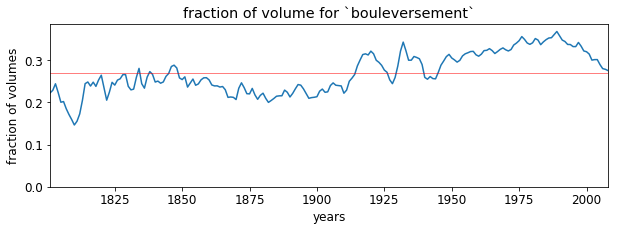

In [167]:
gn.plot( cursor, "bouleversement", k=3, volume=True, normed=True )